## Bank Credit Data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

df = pd.read_csv('german_credit_data.csv', index_col=0)
df['Risk'] = df['Risk'].replace('good', 'low')
df['Risk'] = df['Risk'].replace('bad', 'high')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,low
1,22,female,2,own,little,moderate,5951,48,radio/TV,high
2,49,male,1,own,little,NaN,2096,12,education,low
3,45,male,2,free,little,little,7882,42,furniture/equipment,low
4,53,male,2,free,little,little,4870,24,car,high


## EDA
Here we'll see main information about Dtype, unique values and Nan values, which I'll redact.

Next funtion will show me main information about my dataset:
1) Columns, Dtype
2) Number of unique values
3) Number of NaN values


In [26]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)

    print('FETURE DATA TYPES:')
    display(data.info())

    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    display(data.nunique())

    print('NULL VALUES PER FEATURE')
    display(data.isnull().sum())


In [27]:
show_info(df)

DATASET SHAPE:  (1000, 10) 

--------------------------------------------------
FETURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


None

NUMBER OF UNIQUE VALUES PER FEATURE: 


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

NULL VALUES PER FEATURE


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## Visualization
This part of plots will help me to visualizate future graphs.

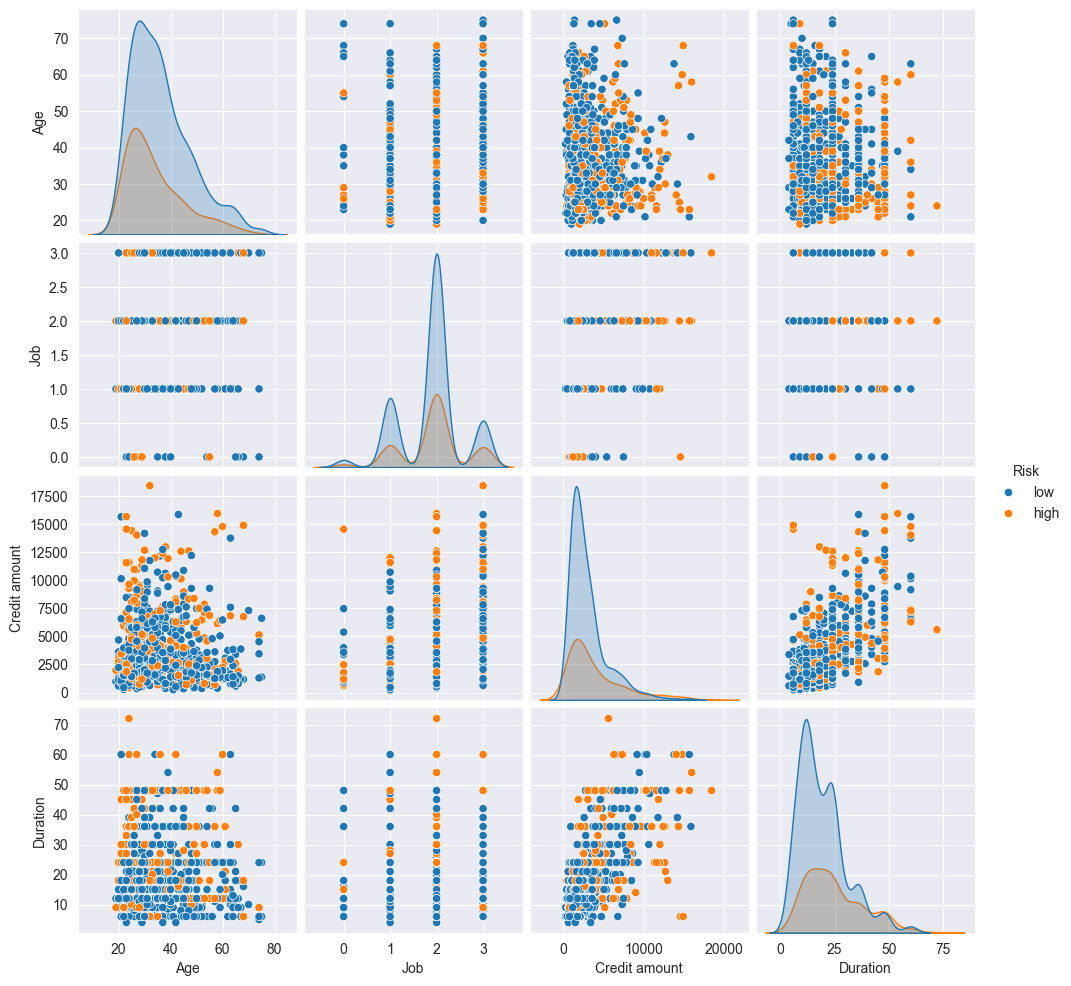

In [28]:
sns.pairplot(df, hue='Risk')

## Gender & Risk
Let's look at the risk ratio associated with past lending history and then compare that to gender

/var/folders/6l/1nxf0jpd4vz8ld_lxz84xqqw0000gp/T/ipykernel_15700/470194.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Risk', ylabel='count'>

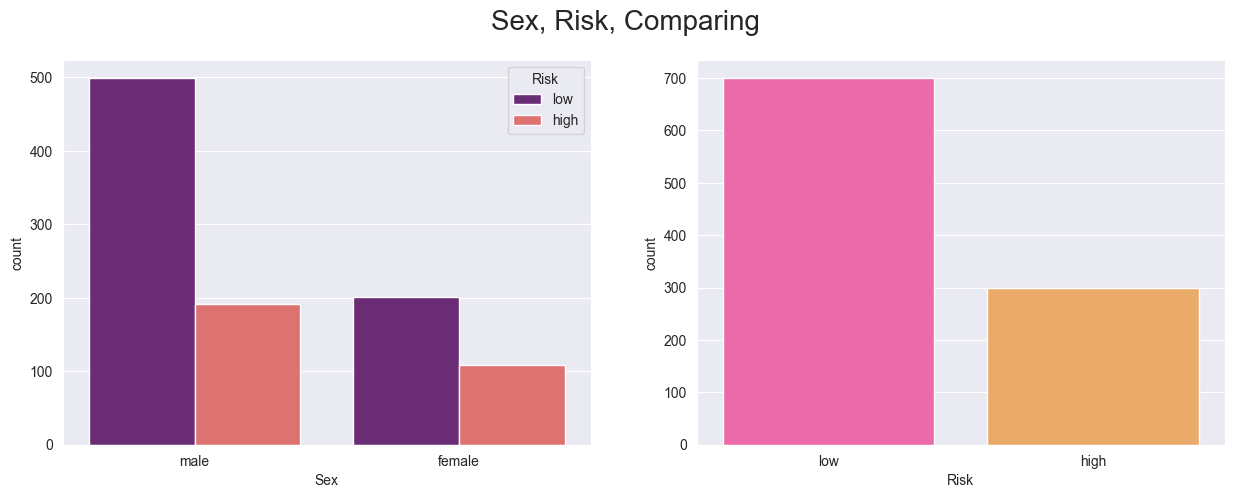

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Sex, Risk, Comparing', fontsize=20)

sns.countplot(data=df, x='Sex', hue='Risk', ax=ax[0], palette='magma')
sns.countplot(data=df, x='Risk', ax=ax[1], palette='spring')

## Skills
Let's take a look at the people with what level of professionalism are most likely to take out a loan and what might that be related to?

In [30]:
# plt.suptitle('Histogram of job skilled', fontsize=20)
# sns.countplot(data=df, x='Job')
px.pie(values=df['Job'].value_counts(),names=df['Job'].value_counts().index).update_layout(title='Histogram of job skills')

## Significant variables & there dependence
Let's look at our significant variables and find out their average values, minimums, maximums, and spreads. 
What dependencies can we find if we compare this variables of our dataset with each other?



In [31]:
df[['Age', 'Credit amount', 'Duration']].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


<Axes: xlabel='Age', ylabel='Duration'>

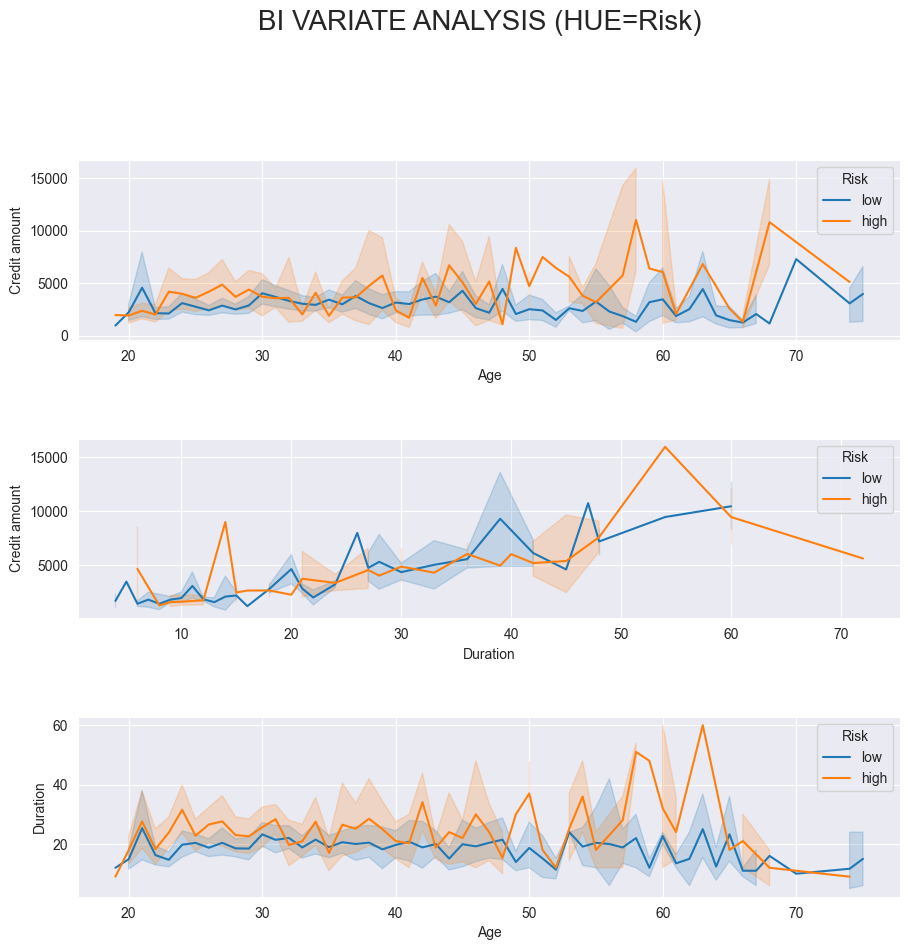

In [32]:
# noinspection PyRedeclaration
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
plt.suptitle('BI VARIATE ANALYSIS (HUE=Risk)', fontsize=20)
plt.tight_layout(pad=5)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Risk', ax=ax[0])
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Risk', ax=ax[1])
sns.lineplot(data=df, x='Age', y='Duration', hue='Risk', ax=ax[2])

## New column 'Average loan'
Add a new column 'Average loan', which will contain the amount people borrow per month (monthly repayment amount without interest)


In [33]:
df["Average loan"] = df['Credit amount'] / df["Duration"]
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Average loan
0,67,male,2,own,NaN,little,1169,6,radio/TV,low,194.833333
1,22,female,2,own,little,moderate,5951,48,radio/TV,high,123.979167
2,49,male,1,own,little,NaN,2096,12,education,low,174.666667
3,45,male,2,free,little,little,7882,42,furniture/equipment,low,187.666667
4,53,male,2,free,little,little,4870,24,car,high,202.916667


## Dependence between Average loan & Job. Outlier.
Check the resulting column with the level of professionalism, what would be the relationship between 'Job' & 'Average loan'?
Is it true that the higher the level of education, the larger the loan amount?

In [34]:
avg = df[['Job', 'Risk', 'Average loan']].groupby(by=['Job', 'Risk'], as_index=False).mean()
avg

,Job,Risk,Average loan
0,0,high,412.855952
1,0,low,164.099339
2,1,high,108.753589
3,1,low,169.820785
4,2,high,142.268924
5,2,low,155.877022
6,3,high,317.078370
7,3,low,205.657012


In [35]:
avg_outlier = df.drop(236)[['Job', 'Risk', 'Average loan']].groupby(by=['Job', 'Risk'], as_index=False).mean()
avg_outlier

,Job,Risk,Average loan
0,0,high,77.359722
1,0,low,164.099339
2,1,high,108.753589
3,1,low,169.820785
4,2,high,142.268924
5,2,low,155.877022
6,3,high,317.078370
7,3,low,205.657012


<Axes: title={'center': 'Dependence without outlier'}, xlabel='Job', ylabel='Average loan'>

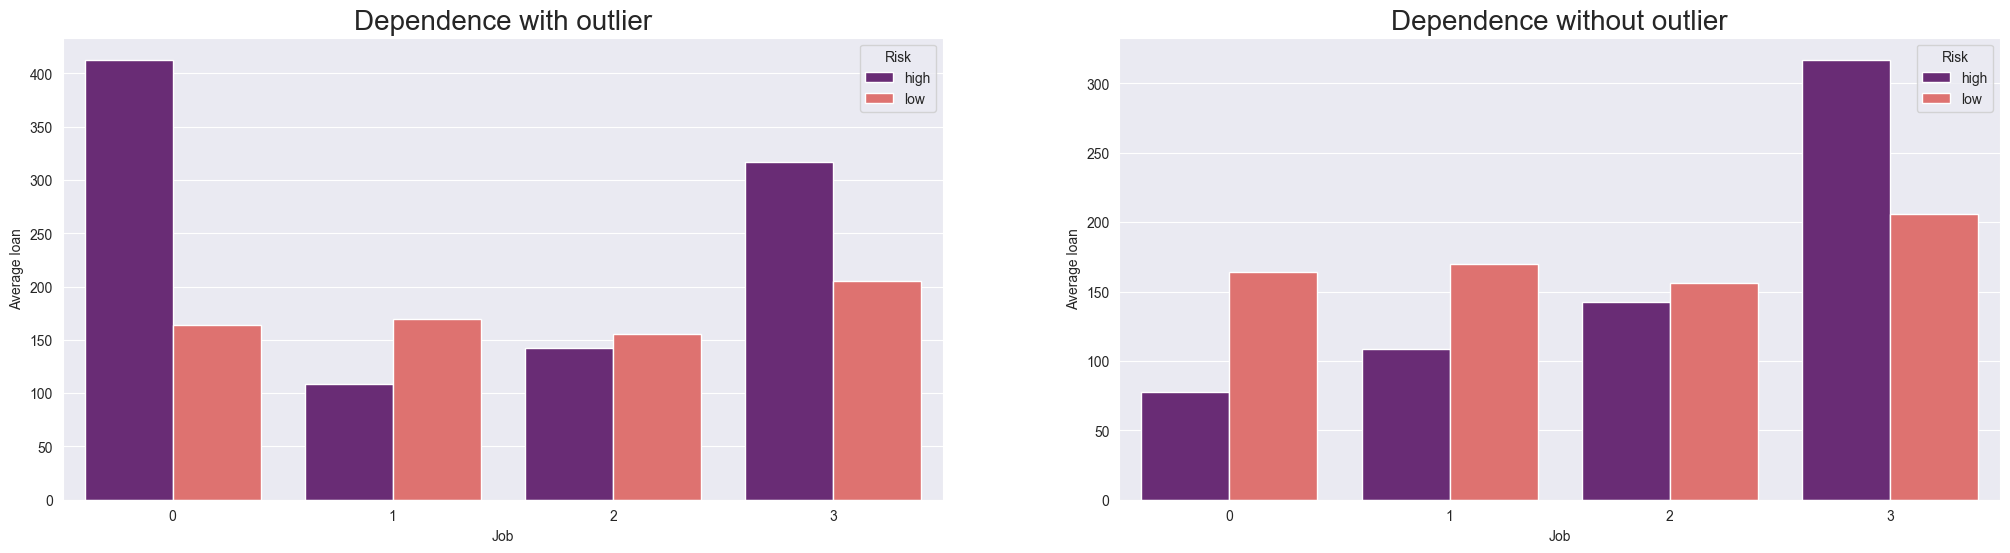

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
ax[0].set_title('Dependence with outlier', fontsize=20)
ax[1].set_title('Dependence without outlier', fontsize=20)

sns.barplot(data=avg, x='Job', y='Average loan', hue='Risk', palette='magma', ax=ax[0])
sns.barplot(data=avg_outlier, x='Job', y='Average loan', hue='Risk', palette='magma', ax=ax[1])

In [37]:
df = df.drop(236)

## NaN values
My data set has columns with NaN values and I need to find similarity to complete that columns or drop them if similarity will not be find

In [38]:
display(df.isna().sum() / df.shape[0])

Age                 0.000000
Sex                 0.000000
Job                 0.000000
Housing             0.000000
Saving accounts     0.182182
Checking account    0.394394
Credit amount       0.000000
Duration            0.000000
Purpose             0.000000
Risk                0.000000
Average loan        0.000000
dtype: float64

Here we can see that 40% of column 'Checking account' consist from NaN. I deleted this column.

In [39]:
df.drop(columns='Checking account', inplace=True)
df[['Saving accounts', 'Housing', 'Credit amount', 'Risk', 'Age']].fillna('NO').groupby(
    by=['Saving accounts', 'Housing', 'Risk']).median()

Credit amount   Age
Saving accounts Housing Risk                     
NO              free    high         8335.0  39.0
                        low          5954.0  37.5
                own     high         1812.0  33.0
                        low          2859.0  37.0
                rent    high         1647.5  27.0
                        low          2628.5  26.5
little          free    high         4268.0  42.5
                        low          3757.0  44.0
                own     high         2505.5  30.0
                        low          1953.5  33.0
                rent    high         2384.0  25.0
                        low          2108.0  26.0
moderate        free    high         3844.0  48.0
                        low          2862.0  31.0
                own     high         1919.0  30.0
                        low          2394.0  31.5
                rent    high         3061.5  25.5
                        low          1734.5  27.5
quite rich      free    high         6738.0  37.0
                        low          1993.5  48.5
                own     high         2397.0  28.0
                        low          2312.5  36.0
                rent    high         2618.0  28.5
                        low          1909.0  28.5
rich            free    high         1345.5  43.5
                own     high         4591.0  54.0
                        low          1587.0  35.0
                rent    high          433.0  24.0
                        low          2894.5  28.5

In [40]:
df[['Saving accounts', 'Housing', 'Credit amount', 'Risk', 'Age']].fillna('NO').groupby(
    by=['Saving accounts', 'Housing', 'Risk']).median()

Credit amount   Age
Saving accounts Housing Risk                     
NO              free    high         8335.0  39.0
                        low          5954.0  37.5
                own     high         1812.0  33.0
                        low          2859.0  37.0
                rent    high         1647.5  27.0
                        low          2628.5  26.5
little          free    high         4268.0  42.5
                        low          3757.0  44.0
                own     high         2505.5  30.0
                        low          1953.5  33.0
                rent    high         2384.0  25.0
                        low          2108.0  26.0
moderate        free    high         3844.0  48.0
                        low          2862.0  31.0
                own     high         1919.0  30.0
                        low          2394.0  31.5
                rent    high         3061.5  25.5
                        low          1734.5  27.5
quite rich      free    high         6738.0  37.0
                        low          1993.5  48.5
                own     high         2397.0  28.0
                        low          2312.5  36.0
                rent    high         2618.0  28.5
                        low          1909.0  28.5
rich            free    high         1345.5  43.5
                own     high         4591.0  54.0
                        low          1587.0  35.0
                rent    high          433.0  24.0
                        low          2894.5  28.5

Unfortunately similarity in column 'Saving accounts' hadn't been found. I replaced NaN values with unknown.

In [41]:
df = df.fillna('unknown')
display(df.isnull().sum())

Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
Average loan       0
dtype: int64

## Saving accounts

In [42]:
avg_sacc = df[['Average loan', 'Credit amount', 'Saving accounts', 'Risk']].groupby(by=['Saving accounts', 'Risk'],
                                                                                    as_index=False).mean()
avg_sacc

,Saving accounts,Risk,Average loan,Credit amount
0,little,high,169.219686,3925.557604
1,little,low,167.604695,2773.101036
2,moderate,high,142.037115,4006.970588
3,moderate,low,158.896509,3077.086957
4,quite rich,high,119.895932,3052.818182
5,quite rich,low,152.482444,2470.423077
6,rich,high,141.403009,3364.666667
7,rich,low,135.047033,2460.357143
8,unknown,high,176.457066,4033.258065
9,unknown,low,177.572697,3809.847682


<Axes: xlabel='Saving accounts', ylabel='Average loan'>

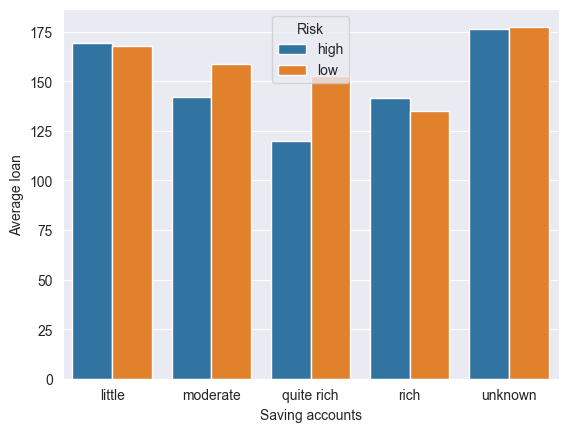

In [43]:
sns.barplot(data=avg_sacc, x='Saving accounts', y='Average loan', hue='Risk')

## Purpose 
There are many purposes to take a loan. The most common are:

In [44]:
avg_purpose = df[['Average loan', 'Purpose', 'Risk']].groupby(by=['Purpose', 'Risk'],
                                                              as_index=False).mean()
avg_purpose

,Purpose,Risk,Average loan
0,business,high,161.541713
1,business,low,152.100877
2,car,high,193.365996
3,car,low,197.374657
4,domestic appliances,high,69.480903
5,domestic appliances,low,113.987500
6,education,high,128.535870
7,education,low,156.021670
8,furniture/equipment,high,176.544124
9,furniture/equipment,low,167.516056


<Axes: xlabel='Purpose', ylabel='Average loan'>

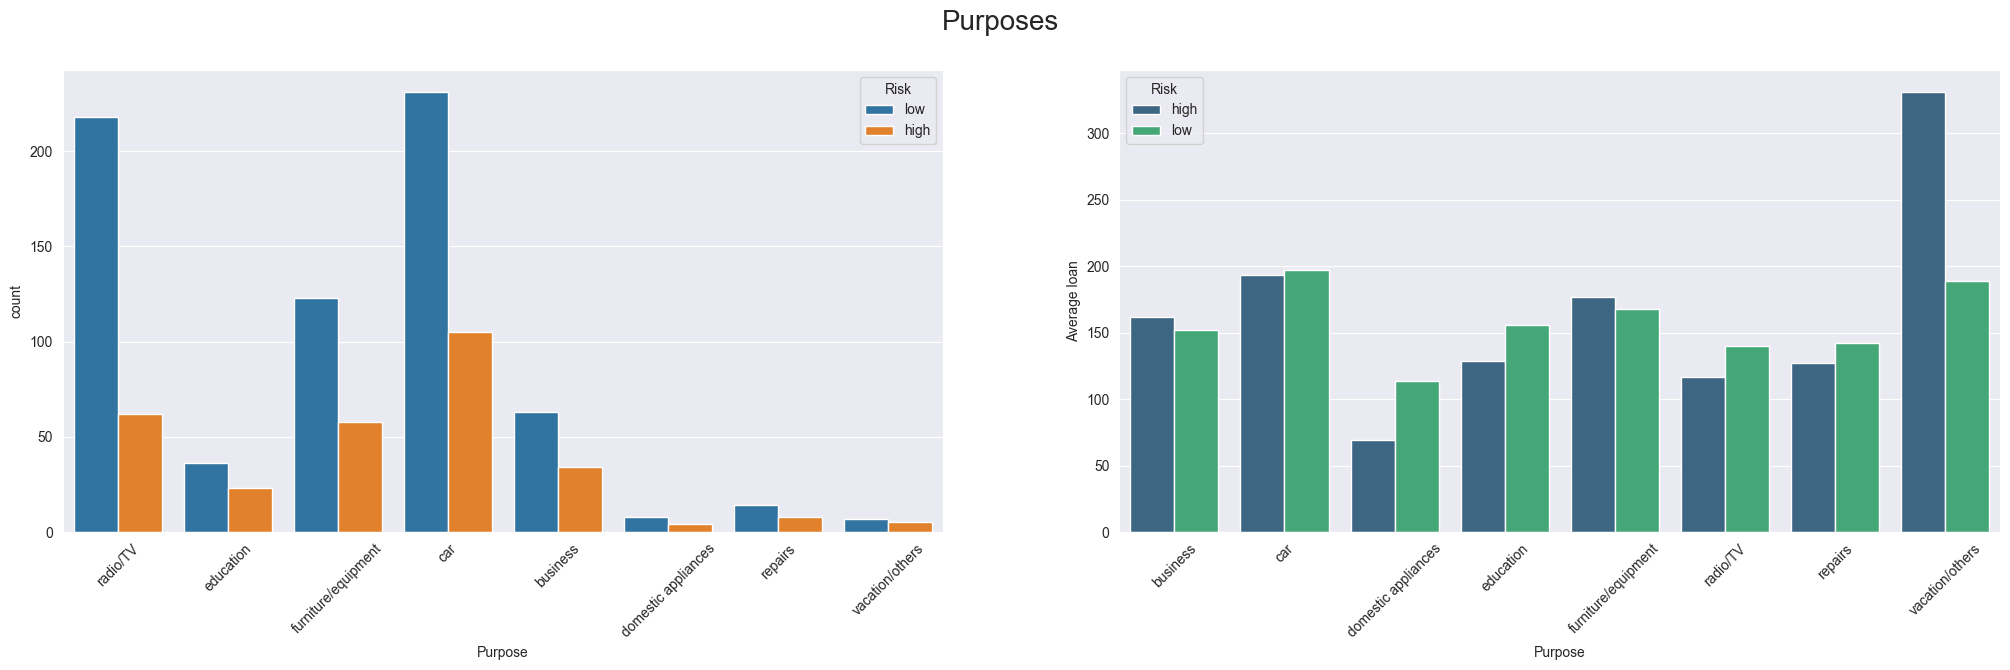

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
plt.suptitle('Purposes', fontsize=20)
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

sns.countplot(data=df, x='Purpose', hue='Risk', ax=ax[0])
sns.barplot(data=avg_purpose, x='Purpose', y='Average loan', hue='Risk', palette='viridis', ax=ax[1])



## Purpose & Loan amount
Is it true that if person has good job skills => bigger payment => bigger loan amount which can be taken? Let's check on the graph below.

In [46]:
avg_job = df[['Average loan', 'Credit amount', 'Job', 'Purpose']].groupby(by=['Purpose', 'Job'],
                                                                          as_index=False).mean()
avg_job

,Purpose,Job,Average loan,Credit amount
0,business,0,125.097222,2099.500000
1,business,1,168.093443,3225.950000
2,business,2,148.111829,4365.333333
3,business,3,171.733364,4846.133333
4,car,0,173.541540,1782.272727
5,car,1,174.526582,2556.045455
6,car,2,168.198285,3339.857895
7,car,3,297.269418,6267.376812
8,domestic appliances,0,110.833333,3990.000000
9,domestic appliances,1,67.611111,1217.000000


<Axes: xlabel='Purpose', ylabel='Credit amount'>

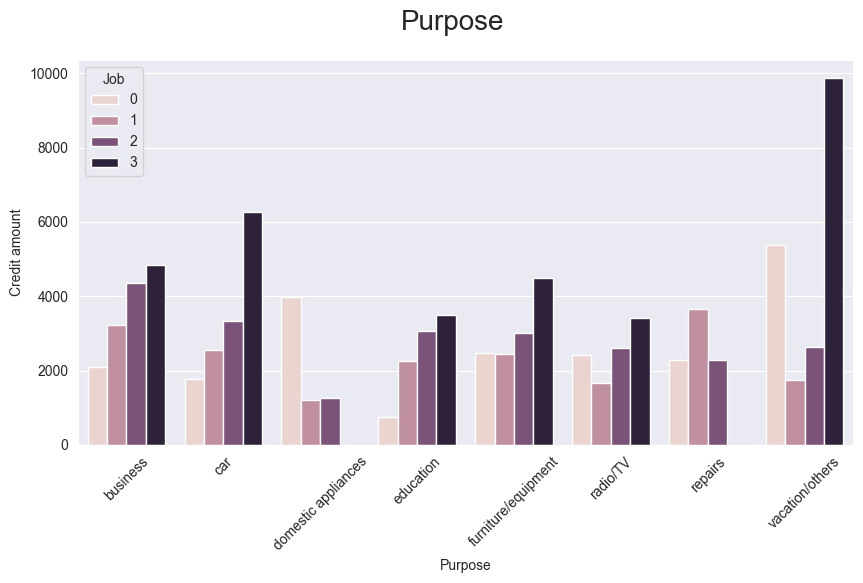

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle('Purpose', fontsize=20)
plt.tick_params(axis='x', labelrotation=45)
sns.barplot(data=avg_job, x='Purpose', y='Credit amount', hue='Job')

In [48]:
df[['Credit amount', 'Job', 'Risk', 'Purpose', 'Duration', 'Housing']]

,Credit amount,Job,Risk,Purpose,Duration,Housing
0,1169,2,low,radio/TV,6,own
1,5951,2,high,radio/TV,48,own
2,2096,1,low,education,12,own
3,7882,2,low,furniture/equipment,42,free
4,4870,2,high,car,24,free
...,...,...,...,...,...,...
995,1736,1,low,furniture/equipment,12,own
996,3857,3,low,car,30,own
997,804,2,low,radio/TV,12,own
998,1845,2,high,radio/TV,45,free
